In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import run_LF as LF

%matplotlib inline
plt.style.use(['seaborn-poster','seaborn-ticks'])

/Users/alexamia/Desktop/REU2020/SAO-REU2020/CODE/run_LF.py:38: RuntimeWarning: divide by zero encountered in log10
  log10_lg = np.log10(lum_grid) #log10 luminosity grid in order to plot it on log10 scale similar to past works


In [2]:
%reload_ext autoreload
%autoreload 2

# Defining observational variables from Konno, Ouchi data

In [5]:
Ouchi_info6 = LF.ouchi_data_plt(zval_test = 6.6, plot = False, mean = False)
Konno_info6 = LF.konno_data_plt(zval_test = 6.6, plot = False, mean = False)
Konno_info7 = LF.konno_data_plt(zval_test = 7.3, plot = False, mean = False)
Shibuya_info7 = LF.shibuya_data_plt(zval_test = 7.3, plot = False, mean = False)

Ota_info70 = LF.ota_data_plt(zval_test = 7.0, plot = False, mean = False)
Itoh_info70 = LF.itoh_data_plt(zval_test = 7.0, plot = False, mean = False)
Hu_info70 = LF.hu_data_plt(zval_test = 7.0, plot = False, mean = False)



In [24]:
# z = 6.6
# log_L6 = np.concatenate((Ouchi_info6[0][:3], Konno_info6[0]), axis=None)
# ndens6 = np.concatenate((Ouchi_info6[1][:3], Konno_info6[1]), axis=None)
# yerror_l6 = np.concatenate((Ouchi_info6[2][0][:3], Konno_info6[2][0]), axis=None)
# yerror_u6 = np.concatenate((Ouchi_info6[2][1][:3], Konno_info6[2][1]), axis=None)

log_L6 = np.concatenate((Ouchi_info6[0][:3]), axis=None)
print(log_L6)
ndens6 = np.concatenate((Ouchi_info6[1][:3]), axis=None)
yerror_l6 = np.concatenate((Ouchi_info6[2][0][:3]), axis=None)
yerror_u6 = np.concatenate((Ouchi_info6[2][1][:3]), axis=None)


[42.5 42.7 42.9]


In [72]:
# z = 7.0
# log_L70 = Itoh_info70[0]
# ndens70 = Itoh_info70[1]
# yerror_l70 = Itoh_info70[2][0]
# yerror_u70 = Itoh_info70[2][1]

# log_L70 = Ota_info70[0]
# ndens70 = Ota_info70[1]
# yerror_l70 = Ota_info70[2][0]
# yerror_u70 = Ota_info70[2][1]

# log_L70 = Zheng_info70[0]
# ndens70 = Zheng_info70[1]
# yerror_u70 = Zheng_info70[2][1]
# yerror_l70 = Zheng_info70[2][0]

# log_L70 = Hu_info70[0]
# ndens70 = Hu_info70[1]
# yerror_u70 = Hu_info70[2][1]
# yerror_l70 = Hu_info70[2][0]

In [15]:
# z = 7.0
# log_L70 = np.concatenate(( Ota_info70[0], Itoh_info70[0]), axis=None)
# ndens70 = np.concatenate((Ota_info70[1], Itoh_info70[1]), axis=None)
# yerror_l70 = np.concatenate((Ota_info70[2][0], Itoh_info70[2][0]), axis=None)
# yerror_u70 = np.concatenate(( Ota_info70[2][1], Itoh_info70[2][1]), axis=None)

log_L70 = np.concatenate(( Ota_info70[0], Itoh_info70[0],Hu_info70[0]), axis=None)
ndens70 = np.concatenate((Ota_info70[1], Itoh_info70[1],Hu_info70[1]), axis=None)
yerror_l70 = np.concatenate((Ota_info70[2][0], Itoh_info70[2][0],Hu_info70[2][0]), axis=None)
yerror_u70 = np.concatenate(( Ota_info70[2][1], Itoh_info70[2][1],Hu_info70[2][1]), axis=None)

In [8]:
# z = 7.3
# log_L7 = Konno_info7[0]
# ndens7 = Konno_info7[1]
# yerror_l7 = Konno_info7[2][0]
# yerror_u7 = Konno_info7[2][1]
log_L7 = np.concatenate((Shibuya_info7[0], Konno_info7[0]), axis=None)
ndens7 = np.concatenate((Shibuya_info7[1], Konno_info7[1]), axis=None)
yerror_l7 = np.concatenate((Shibuya_info7[2][0], Konno_info7[2][0]), axis=None)
yerror_u7 = np.concatenate((Shibuya_info7[2][1], Konno_info7[2][1]), axis=None)



# Establishing prior, likelihood, & posterior

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


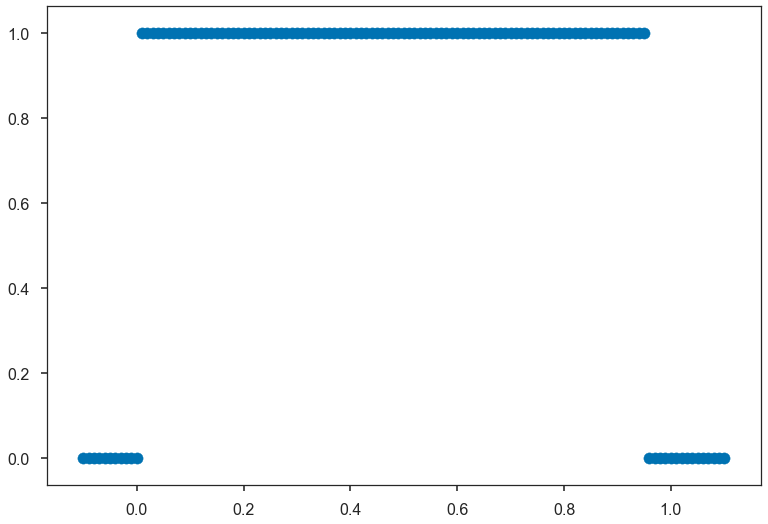

In [9]:
xHI_min = 0.
xHI_max = 0.95

# xHI_grid = np.linspace(-0.1,1.1)
xHI_grid = np.arange(-0.1, 1.1, 0.01)
def log_prior(theta):
    """
    Returns log(prior) for a given parameter vector
    
    Parameters
    ----------
    theta: list, array-like
        List of parameters in the form [slope, intercept]
    
    Returns
    -------
    ln_prior: float
        Natural log of the prior probability function
    """
    xHI = theta
    prob_xHI = np.zeros(len(xHI))
    
    
    prob_xHI[(xHI_min <= xHI) & (xHI <= xHI_max)] = 1. # Log prior (not worrying about normalization)


    ln_prior = np.log(prob_xHI)  # Log of the probability
    return ln_prior
# plt.scatter(xHI_grid, [np.exp(log_prior(xHI)) for xHI in xHI_grid])
plt.scatter(xHI_grid, np.exp(log_prior(xHI_grid)))

In [10]:
def log_likelihood(theta, x, y, dy_l, dy_u, z, model_err=0.1, log=False):
    """
    Returns log(likelihood) for a given parameter vector
    
    Parameters
    ----------
    theta: list, array-like
        List of parameters in the form [slope, intercept]
    x: list, array-like
        x-values of your data
    y: list, array-like
        y-values of your data
    dy: list, array-like
        Uncertainties on the y-values of your data
    
    Returns
    -------
    ln_like: float
        Natural log of the likelihood function
    """
    xHI_mod = theta

    #Zheng upperlim indexing
    idx_ul = np.where(dy_l == 0.)[0]
    
    #Nearest neighbor to xHI list
    idx = (np.abs(LF.xHI_list - xHI_mod)).argmin()
    xHI_grid_match = LF.xHI_list[idx]

    # Model LF
    y_model = LF.xHI_model(xHI_grid_match, obs_L = x, zval= z)
    
    # Uncertainty in model LF = 0.1*model
    sigma_Lya_LF = model_err*y_model
    
    if log:
        # Convert linear observations to log
        y_log    = np.log10(y)
        dy_l_log = y_log - np.log10(y-dy_l)
        dy_u_log = np.log10(y+dy_u) - y_log

        y_model_log = np.log10(y_model)
        
        # Model uncertainty now asymmetric
        sigma_Lya_LF_l_log = y_model_log - np.log10(y_model-sigma_Lya_LF)
        sigma_Lya_LF_u_log = np.log10(y_model+sigma_Lya_LF) - y_model_log
        
        # Error bars
        dy_l_total_log = np.sqrt(dy_l_log**2. + sigma_Lya_LF_l_log**2.)
        dy_u_total_log = np.sqrt(dy_u_log**2. + sigma_Lya_LF_u_log**2.)

        A = 1./np.sqrt(2.*np.pi)/(0.5*(dy_l_total_log + dy_u_total_log))

        #Defining split-likelihood
        lnlikelihood   = np.log(A) - 0.5 * ((y_model_log - y_log)/dy_l_total_log)**2. # lower
        lnlikelihood_u = np.log(A) - 0.5 * ((y_model_log - y_log)/dy_u_total_log)**2. # upper
        lnlikelihood[y_model >= y] = lnlikelihood_u[y_model >= y]
    
    else:
        # Error bars
        dy_l_total = np.sqrt(dy_l**2. + sigma_Lya_LF**2.)
        dy_u_total = np.sqrt(dy_u**2. + sigma_Lya_LF**2.)

        A = 1./np.sqrt(2.*np.pi)/(0.5*(dy_l_total + dy_u_total))

        #Defining split-likelihood
        lnlikelihood   = np.log(A) - 0.5 * ((y_model - y)/dy_l_total)**2. # lower
        lnlikelihood_u = np.log(A) - 0.5 * ((y_model - y)/dy_u_total)**2. # upper
        lnlikelihood[y_model >= y] = lnlikelihood_u[y_model >= y]

        # if upper limit exists, replace with this likelihood
        if len(idx_ul) >= 1:
            print('Treating upper limit')
            if y_model[idx_ul] <= y[idx_ul]:

                lnlikelihood[idx_ul] = np.log(1.)

            elif y_model[idx_ul] > y[idx_ul]:

                lnlikelihood[idx_ul] = -(y_model[idx_ul] - y[idx_ul])**2/(2*dy_u[idx_ul]**2)

    ln_like = np.sum(lnlikelihood)
    
    return ln_like

In [11]:
def log_posterior(theta, x, y, dy_l, dy_u, z, log=False):
    """
    Returns log(posterior) for a given parameter vector
    
    Parameters
    ----------
    theta: list, array-like
        List of parameters in the form [slope, intercept]
    x: list, array-like
        x-values of your data
    y: list, array-like
        y-values of your data
    dy: list, array-like
        Uncertainties on the y-values of your data
    
    Returns
    -------
    ln_post: float
        Natural log of the posterior probability function
    """

    ln_post = log_prior(theta) + np.array([log_likelihood(t, x, y, dy_l, dy_u, z, log=log) for t in theta])  # From Bayes Theorem
    return ln_post

In [28]:
# z = 6.6
log_post66 = log_posterior(theta = xHI_grid, x = log_L6, y = ndens6, dy_l = yerror_l6, dy_u = yerror_u6, z = 6.6)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/Users/alexamia/Desktop/REU2020/SAO-REU2020/CODE/run_LF.py:569: RuntimeWarning: divide by zero encountered in log10
  pL_interp      = interpolate.interp1d(np.log10(lum_lya[:,mm].value), np.log10(norm_pLya[:,mm]), fill_value=-np.inf, bounds_error=False)
/Users/alexamia/Desktop/REU2020/SAO-REU2020/CODE/run_LF.py:570: RuntimeWarning: divide by zero encountered in log10
  new_pLya_Muv   = 10**pL_interp(np.log10(lum_grid))


In [83]:
# z = 7.0
log_post70 = log_posterior(theta = xHI_grid, x = log_L70, y = ndens70, dy_l = yerror_l70, dy_u = yerror_u70, z = 7.0)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/Users/alexamia/Desktop/REU2020/SAO-REU2020/CODE/run_LF.py:565: RuntimeWarning: divide by zero encountered in log10
  new_pLya[:,mm] = normalize_pL(lum_grid, new_pLya_Muv) #column values of pLya
/Users/alexamia/Desktop/REU2020/SAO-REU2020/CODE/run_LF.py:566: RuntimeWarning: divide by zero encountered in log10
  


In [12]:
# z = 7.3
log_post73 = log_posterior(theta = xHI_grid, x = log_L7, y = ndens7, dy_l = yerror_l7, dy_u = yerror_u7, z = 7.3)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/Users/alexamia/Desktop/REU2020/SAO-REU2020/CODE/run_LF.py:580: RuntimeWarning: divide by zero encountered in log10
  pL_interp      = interpolate.interp1d(np.log10(lum_lya[:,mm].value), np.log10(norm_pLya[:,mm]), fill_value=-np.inf, bounds_error=False)
/Users/alexamia/Desktop/REU2020/SAO-REU2020/CODE/run_LF.py:581: RuntimeWarning: divide by zero encountered in log10
  new_pLya_Muv   = 10**pL_interp(np.log10(lum_grid))


# Defining function to find xHI for given redshift posterior

In [13]:
def finding_xHI(xHI_grid, z, post, plot = False):
    
    linear_post = np.exp(post)
    integral_post = np.trapz(linear_post, xHI_grid)
    normalized_post = linear_post / integral_post
    
    CDF = np.cumsum(normalized_post*np.gradient(xHI_grid))
    CDF_norm = CDF / CDF.max()

    # 68% Confidence Interval lower, median, upper limit
    CI16 = np.interp(0.16, CDF_norm, xHI_grid)
    CI50 = np.interp(0.5, CDF_norm, xHI_grid)
    CI84 = np.interp(0.84, CDF_norm, xHI_grid)
    print("0.16 CI lower limit:  %s" % CI16)
    print("0.50 CI median limit:  %s" % CI50)
    print("0.84 CI upper limit:  %s" % CI84)

    # 95% Confidence Interval lower, upper limit
    CI025 = np.interp(0.025, CDF_norm, xHI_grid)
    CI975 = np.interp(0.975, CDF_norm, xHI_grid)
    print("0.025 CI lower limit:  %s" % CI025)
    print("0.975 CI upper limit:  %s" % CI975)
    
    if plot == True:
        plt.plot(xHI_grid, normalized_post)
        # 68% CI lower, median, upper limit
        plt.axvline(CI16, color = 'black', lw = 0.9, ls = '--')
        plt.axvline(CI50, color = 'black', lw = 0.9,ls = '--')
        plt.axvline(CI84, color = 'black', lw = 0.9,ls = '--')

        # 95% CI lower, upper limit
        plt.axvline(CI025, color = 'black', lw = 0.9,ls = '-')
        plt.axvline(CI975, color = 'black', lw = 0.9,ls = '-')
        title = mlines.Line2D([], [],marker=' ',linestyle=' ',label='z = %.1f'%z)
        line1 = mlines.Line2D([], [], color='black', ls='--', label='68% Confidence Interval')
        line2 = mlines.Line2D([], [], color='black', ls='-', label='95% Confidence Interval')
        plt.xlim(0,1)
        plt.legend(handles=[title,line1,line2], loc='upper right', frameon=False, handletextpad=0.5, handlelength=1.5)
        if z == 7.3:
            plt.legend(handles=[title,line1,line2], loc='upper left', frameon=False, handletextpad=0.5, handlelength=1.5)
        plt.xlabel('Neutral Fraction $\overline{x}_\mathrm{HI}$')
        plt.ylabel('Normalized Posterior')
    return

0.16 CI lower limit:  0.05167499430172668
0.50 CI median limit:  0.14280417503477968
0.84 CI upper limit:  0.23095142557916626
0.025 CI lower limit:  0.008704690108977757
0.975 CI upper limit:  0.3165327164128331


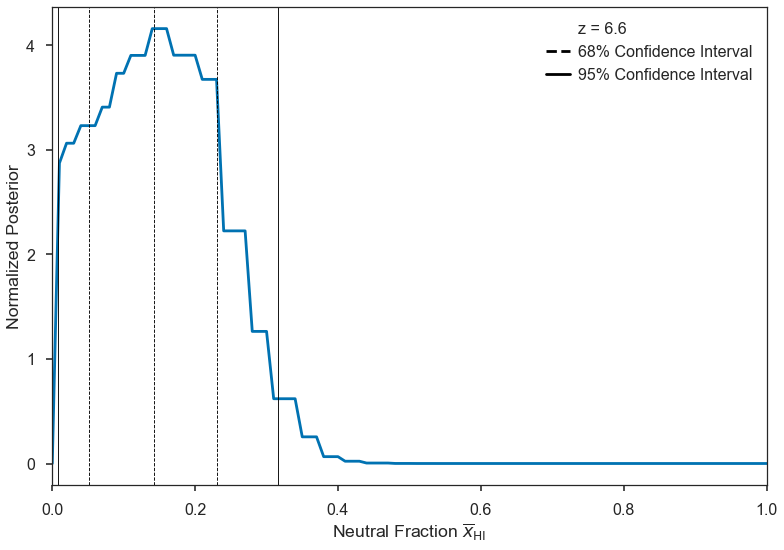

In [30]:
# z = 6.6
# plt.figure(figsize=(6.,4.), dpi=150)
finding_xHI(xHI_grid, z = 6.6, post = log_post66, plot = True)
# plt.savefig('xHIminimize66.pdf', bbox_inches='tight')
# plt.show()

0.16 CI lower limit:  0.23726019338010249
0.50 CI median limit:  0.2817203535320667
0.84 CI upper limit:  0.33052764269003687
0.025 CI lower limit:  0.18619391782668662
0.975 CI upper limit:  0.36717485796096144


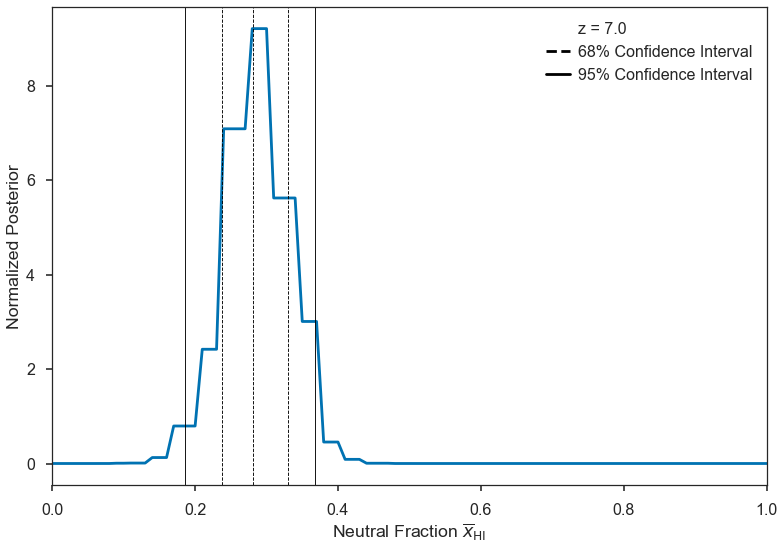

In [95]:
# z = 7.0
# plt.figure(figsize=(6.,4.), dpi = 150.)

finding_xHI(xHI_grid, z = 7.0, post = log_post70, plot = True)
# plt.savefig('xHIminimize70.pdf', bbox_inches='tight')
# plt.show()

0.16 CI lower limit:  0.7614815023169377
0.50 CI median limit:  0.825574212320615
0.84 CI upper limit:  0.8904911006846071
0.025 CI lower limit:  0.7027539683766817
0.975 CI upper limit:  0.9375396444140767


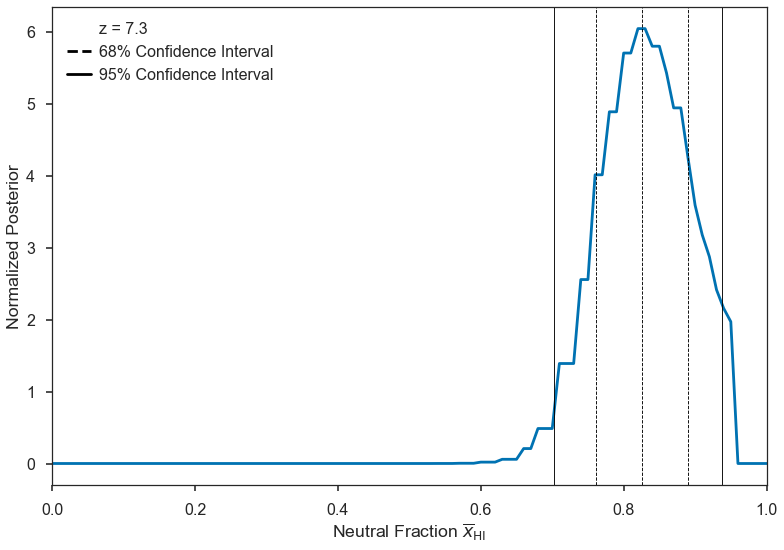

In [14]:
# z = 7.3
# plt.figure(figsize=(6.,4.), dpi=150)

finding_xHI(xHI_grid, z = 7.3, post = log_post73, plot = True)
# plt.savefig('xHIminimize73.pdf', bbox_inches='tight')
# plt.show()

# Test Code

In [155]:
#Test Cell
np.random.seed(0)

y_model = np.ones(10)
y = np.random.rand(10)+0.5
likelihood = (y_model - y)**2.
# likelihood = 1

# likelihood[y_model >= y] = 0
print(likelihood[y_model >= y])

likelihood2 = -(y_model - y)**2.
print(likelihood2[y_model >= y])
likelihood[y_model >= y] = likelihood2[y_model >= y]
print(likelihood)

[0.00582859 0.00389536 0.01358588]
[-0.00582859 -0.00389536 -0.01358588]
[ 0.00238276  0.04630646  0.01056031  0.0020145  -0.00582859  0.02128509
 -0.00389536  0.15348608  0.21498316 -0.01358588]


4
[ 0.00238276  0.04630646  0.01056031  0.0020145   1.          0.02128509
 -0.00389536  0.15348608  0.21498316 -0.01358588]
[0. 0. 0. 0. 1. 0. 0. 0.]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log


ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

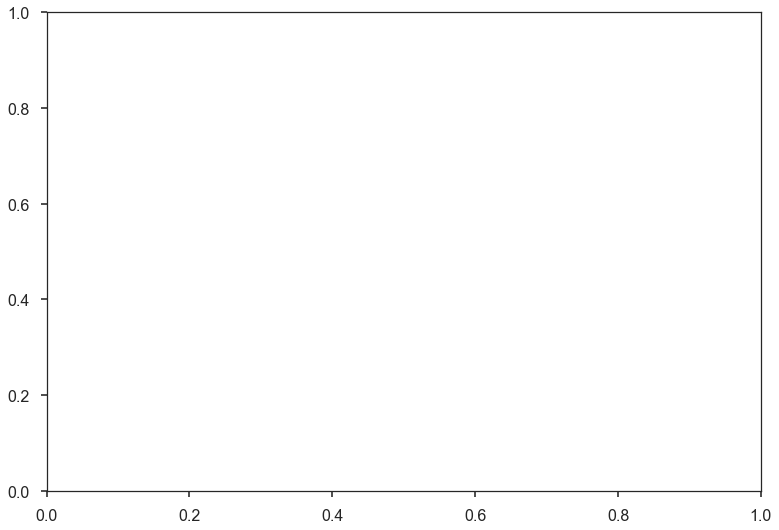

In [153]:
# find index where upper = 0, replace likelihood
# give lower = 0.1mu, replace lower likelihood w this 

def log_likelihood2(theta, x, y, dy_l, dy_u, z):
    """
    Returns log(likelihood) for a given parameter vector
    
    Parameters
    ----------
    theta: list, array-like
        List of parameters in the form [slope, intercept]
    x: list, array-like
        x-values of your data
    y: list, array-like
        y-values of your data
    dy: list, array-like
        Uncertainties on the y-values of your data
    
    Returns
    -------
    ln_like: float
        Natural log of the likelihood function
    """
    xHI_mod = theta
    
    #Zheng upperlim indexing
    idx_ul = (np.abs(dy_u)).argmin()   
    print(idx_ul)
    
    #Nearest neighbor to xHI list
    idx = (np.abs(LF.xHI_list - xHI_mod)).argmin()
    xHI_grid_match = LF.xHI_list[idx]
    
    y_model = LF.xHI_model(xHI_grid_match, obs_L = x, zval= z)
    
    #Likelihood info for Zheng 7.0 upperlimit

    likelihood[idx_ul] = 1
    likelihood2 = np.exp((-(y_model-dy_l[idx_ul])**2)/(2*dy_l**2))
    print(likelihood)
    likelihood2[idx_ul] = likelihood[idx_ul]
    print(likelihood2)
    ln_like = np.sum(np.log(likelihood2))
    plt.plot(y_model, ln_like)
#     print(ln_like)
    

#     return ln_like
    return

log_likelihood2(theta = LF.xHI_list, x = log_L70, y = ndens70, dy_l = yerror_l70, dy_u = yerror_u70, z = 7.0)

In [117]:
idx = (np.abs(LF.xHI_list - xHI_mod)).argmin()
xHI_grid_match = LF.xHI_list[idx]

y_model = LF.xHI_model(xHI_grid_match, obs_L = x, zval= z)

(121,)
